### Time Series Modeling with Prophet

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
plt.style.use('fivethirtyeight')
rcParams['text.color'] = 'k'

In [4]:
path = os.getcwd()
data = pd.read_csv(os.path.join(path, 'data.csv'),sep=';')

In [5]:
data['DOR'] = pd.to_datetime(data['DOR'])
data.head()

,Name,Sex,Age,Area,DOR
0,UNNIKRISHNAN,M,17.0,CORPORATION,2013-01-01
1,MURAMMIL,M,6.0,ANDOORKONAM,2013-01-01
2,RAJAMMA,F,50.0,BALARAMAPURAM,2013-01-01
3,ANJU,F,15.0,CORPORATION,2013-01-01
4,THANKAMANI,F,43.0,POOZHANAD,2013-01-01


In [6]:
data['MnthWse'] = data['DOR'].map(lambda x: x.strftime('%Y-%m'))
sumry = pd.DataFrame(data.MnthWse.value_counts().sort_index()).reset_index()
sumry.columns = ['MnthWse', 'Cnt']
# sumry['MnthWse'] = pd.to_datetime(sumry['MnthWse'], format='%Y-%m')
# sumry['MnthWse'] = sumry['MnthWse'].map(lambda x: x.strftime('%Y-%m'))
sumry['MnthWse'] = pd.to_datetime(sumry.MnthWse)
sumry = sumry.set_index(sumry.MnthWse)
sumry.drop('MnthWse', axis = 1, inplace = True)

In [7]:
sumry.head()

,Cnt
MnthWse,
2013-01-01,224
2013-02-01,217
2013-03-01,238
2013-04-01,324
2013-05-01,456


In [8]:
sumry = sumry.rename_axis('MnthWse').reset_index()
ts = sumry.rename(columns={'MnthWse': 'ds', 'Cnt': 'y'})
ts

,ds,y
0,2013-01-01,224
1,2013-02-01,217
2,2013-03-01,238
3,2013-04-01,324
4,2013-05-01,456
...,...,...
67,2018-08-01,27
68,2018-09-01,24
69,2018-10-01,23
70,2018-11-01,32


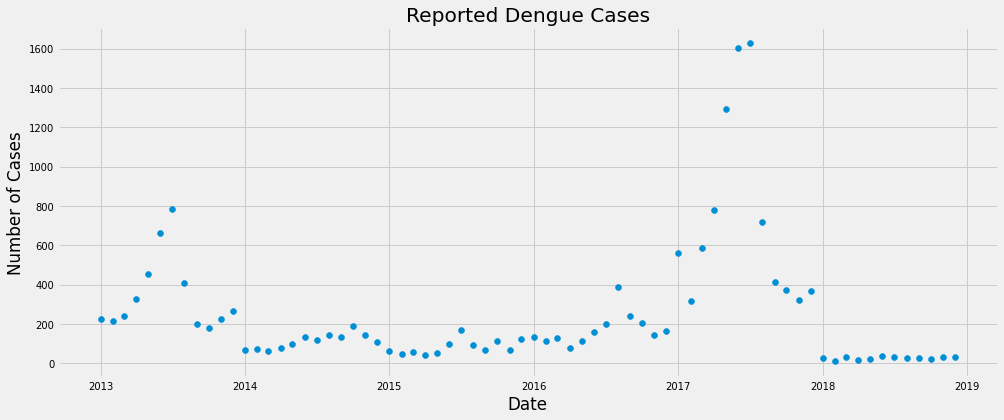

In [9]:
plt.scatter(x=ts['ds'], y=ts['y'])
plt.title('Reported Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

ARIMA model worked decently for us but it is not good enough as our time series was short. In such cases, we can use Prophet which is built on STAN, a programming language for statistical inference written in C++. It can fit data with yearly, weekly, and daily seasonality also it can incorporate holiday effects.

In [10]:
ts_model = Prophet(interval_width=0.95)
ts_model.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
ts_forecast = ts_model.make_future_dataframe(periods=36, freq='MS')
ts_pred = ts_model.predict(ts_forecast)
ts_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,202.975103,-361.748926,782.193467,202.975103,202.975103,18.247970,18.247970,18.247970,18.247970,18.247970,18.247970,0.0,0.0,0.0,221.223073
1,2013-02-01,203.961817,-511.380205,768.408380,203.961817,203.961817,-102.328299,-102.328299,-102.328299,-102.328299,-102.328299,-102.328299,0.0,0.0,0.0,101.633518
2,2013-03-01,204.853044,-431.532374,686.369624,204.853044,204.853044,-63.453897,-63.453897,-63.453897,-63.453897,-63.453897,-63.453897,0.0,0.0,0.0,141.399146
3,2013-04-01,205.839759,-425.026098,769.009551,205.839759,205.839759,-35.762355,-35.762355,-35.762355,-35.762355,-35.762355,-35.762355,0.0,0.0,0.0,170.077403
4,2013-05-01,206.794644,-245.016387,907.995853,206.794644,206.794644,102.463224,102.463224,102.463224,102.463224,102.463224,102.463224,0.0,0.0,0.0,309.257868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-08-01,302.728787,-207.960011,928.454531,302.728744,302.728833,66.459513,66.459513,66.459513,66.459513,66.459513,66.459513,0.0,0.0,0.0,369.188300
104,2021-09-01,303.715502,-401.647468,779.244620,303.715457,303.715550,-79.511066,-79.511066,-79.511066,-79.511066,-79.511066,-79.511066,0.0,0.0,0.0,224.204436
105,2021-10-01,304.670387,-365.391820,803.896275,304.670341,304.670437,-78.630626,-78.630626,-78.630626,-78.630626,-78.630626,-78.630626,0.0,0.0,0.0,226.039761
106,2021-11-01,305.657102,-383.652976,805.159678,305.657054,305.657154,-90.149231,-90.149231,-90.149231,-90.149231,-90.149231,-90.149231,0.0,0.0,0.0,215.507871


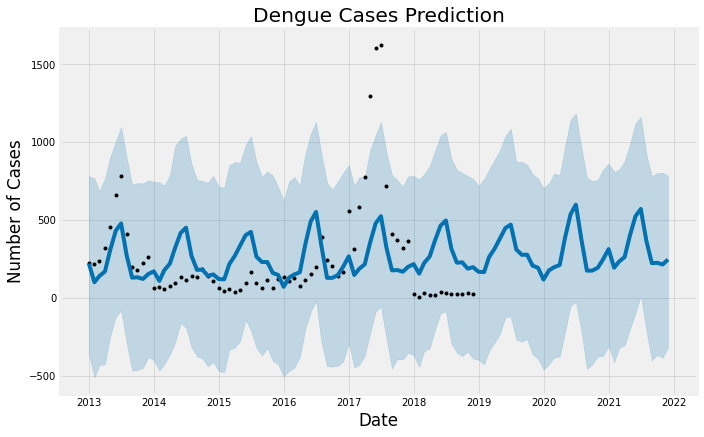

In [12]:
ts_model.plot(ts_pred, xlabel = 'Date', ylabel = 'Number of Cases')
plt.title('Dengue Cases Prediction');

The model can capture the seasonality pattern in data but as we have very few data points (72) model is not that precise in the prediction.

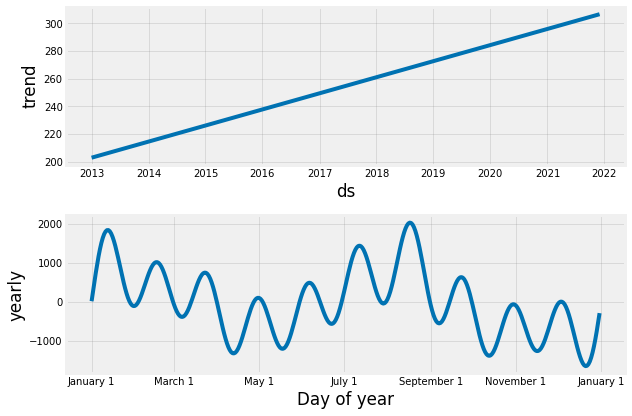

In [13]:
fig = ts_model.plot_components(ts_pred)

We can see two ups & downs in the reported dengue cases. More cases are reported in the 1st three months then it comes down then increases from July and peaks in September & again it comes down by October.